## Imports

In [10]:
import sys, os
# Add the project's root directory to the Python path
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('../src'))))


import src.linear, src.ensemble, src.svm, src.slp, src.mlp, src.cnn, src.clustering, src.util, src.metrics

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

## Dataset

In [11]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
wine_data, wine_target = wine.iloc[:, 1:].values, wine.iloc[:, 0]-1

## Clustering

Cluster the data using K-Means clustering.

Determine the optimal number of clusters using the elbow method:

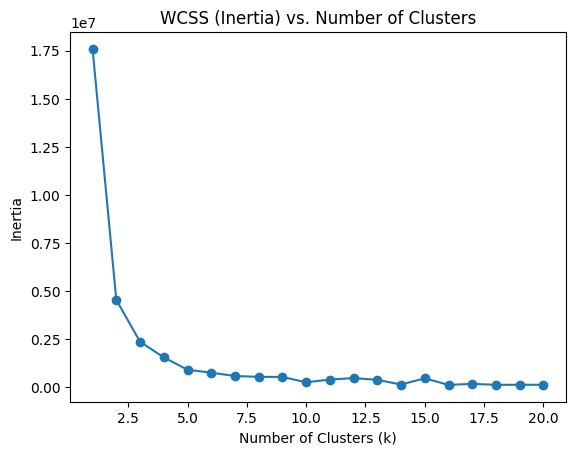

In [12]:
from src.clustering import KMeans

# Calculate inertia for different numbers of clusters
inertias = []
k_values = range(1, 21)  # Test cluster numbers from 1 to 20

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(wine_data)
    
    # Calculate the squared distances to the nearest cluster center for each sample
    distances = []
    for i in range(len(wine_data)):
        sample = wine_data[i]
        dist = np.linalg.norm(sample - kmeans.centroids_, axis=1)
        distances.append(np.min(dist) ** 2)
    
    # Calculate the inertia by summing up the squared distances
    inertia = np.sum(distances)
    inertias.append(inertia)

# Plot the inertia values
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('WCSS (Inertia) vs. Number of Clusters')
plt.show()


In [13]:
from src.clustering import KMeans

# Initialize KMeans model
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model
kmeans.fit(wine_data)

# Get the predicted labels
labels = kmeans.labels_

# Print the predicted labels
print("Predicted labels:", labels)

# Get the score of the KMeans model
score = kmeans.score(wine_data)

Predicted labels: [2 2 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 1 1 1 1 1 2 1 2 1 1 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2
 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 2 0 0
 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 2 0]
KMeans performance on test data:
{'silhouette_score': 0.5595823478987215}


## Linear Regression
Compare linear and logistic regression.

In [14]:
from src.util import train_test_split
from src.linear import LinearRegressor, LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target)

# Initialize models
linear_regressor = LinearRegressor()
logistic_regressor = LogisticRegression()

# Fit models
linear_regressor.fit(X_train, y_train)
logistic_regressor.fit(X_train, y_train)

# Evaluate models
linear_regression_r2_score = linear_regressor.score(X_test, y_test)
logistic_regression_accuracy = logistic_regressor.score(X_test, y_test)

print("Linear Regression R2 score on test data:", linear_regression_r2_score)
print("Logistic Regression accuracy on test data:", logistic_regression_accuracy)


Linear Regression R2 score on test data: 0.8878226300580406
Logistic Regression accuracy on test data: 0.5142857142857142


## Linear Classification
Investigate the performance of a linear classifier.

In [15]:
from sklearn.preprocessing import StandardScaler
from src.slp import SLPClassifier
from src.util import train_test_split, normalize

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target)

'''
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


'''
# Scale the input features using normalize() from util
X_train_scaled = normalize(X_train)
X_test_scaled = normalize(X_test)


# Convert y_train to a numpy array and reshape it
y_train = y_train.to_numpy().reshape(-1, 1).squeeze()

# Initialize the SLPClassifier
slp_classifier = SLPClassifier(hidden_layer_size=100, lr=0.001, epochs=500, random_state=31)

# Fit the SLPClassifier to the training data
slp_classifier.fit(X_train_scaled, y_train)

# Evaluate the SLPClassifier on the training data
train_accuracy = slp_classifier.score(X_train_scaled, y_train)
print("SLPClassifier accuracy on training data:", train_accuracy)

# Evaluate the SLPClassifier on the test data
test_accuracy = slp_classifier.score(X_test_scaled, y_test)
print("SLPClassifier accuracy on test data:", test_accuracy)

# Make predictions using the trained SLPClassifier
predictions = slp_classifier.predict(X_test_scaled)
print('')
print("Predicted class labels:", predictions.tolist())
print("True class labels:     ", y_test.tolist()) # Convert to list for single line display

SLPClassifier accuracy on training data: 1.0
SLPClassifier accuracy on test data: 0.9142857142857143

Predicted class labels: [2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1]
True class labels:      [2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1]


## Ensembles

Compare the performance of a base learner and an ensemble of increasing size.

As a sanity check, this should include an ensemble of size 1 to confirm that it behaves similarly to the base learner.

In [16]:
from src.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target)

# Initialize base learner
base_learner = GradientBoostingClassifier()

# Fit base learner
base_learner.fit(X_train, y_train)

# Make predictions using the base learner
base_learner_predictions = base_learner.predict(X_test)

# Evaluate accuracy of the base learner
base_learner_accuracy = accuracy_score(y_test, base_learner_predictions)
print("Base Learner (GBC) accuracy on test data:", base_learner_accuracy)
print(' ')

# Initialize ensemble classifier
ensemble_classifier = GradientBoostingClassifier()

# Create a list to store ensemble accuracies
ensemble_accuracies = []

# Iterate over ensemble sizes from 1 to a desired maximum size
max_ensemble_size = 7
for size in range(1, max_ensemble_size + 1):
    # Increase the number of boosting iterations for the ensemble classifier
    ensemble_classifier.n_estimators = size * base_learner.n_estimators
    
    # Fit ensemble classifier
    ensemble_classifier.fit(X_train, y_train)
    
    # Make predictions using the ensemble classifier
    ensemble_predictions = ensemble_classifier.predict(X_test)
    
    # Evaluate accuracy of the ensemble classifier
    ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
    ensemble_accuracies.append(ensemble_accuracy)
    
    print("Ensemble of size {} accuracy on test data:".format(size), ensemble_accuracy)

Base Learner (GBC) accuracy on test data: 0.9428571428571428
 
Ensemble of size 1 accuracy on test data: 0.9714285714285714
Ensemble of size 2 accuracy on test data: 0.9428571428571428
Ensemble of size 3 accuracy on test data: 0.9714285714285714
Ensemble of size 4 accuracy on test data: 0.9428571428571428
Ensemble of size 5 accuracy on test data: 0.9428571428571428
Ensemble of size 6 accuracy on test data: 0.9428571428571428
Ensemble of size 7 accuracy on test data: 0.9428571428571428


## Deep Learning

Investigate how increasing network width influences Classification performance.

Suggested hyper-parameters:

- width: `{5..100} neurons` 
- activation: `tanh`
- epochs: `200`

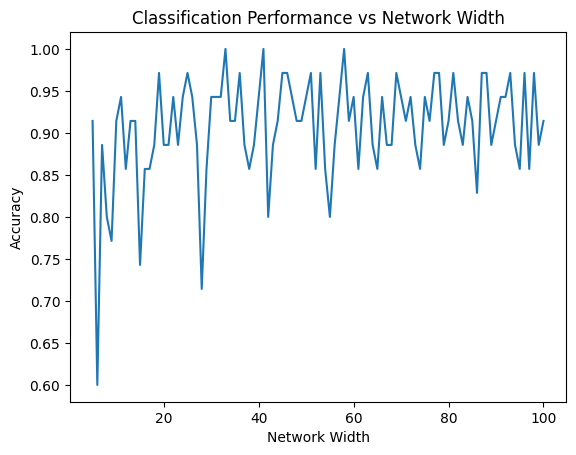

In [39]:
import matplotlib.pyplot as plt
from src.slp import SLPClassifier
from src.util import train_test_split, normalize

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target)

# Scale the input features using normalize() from util
X_train_scaled = normalize(X_train)
X_test_scaled = normalize(X_test)

# Convert y_train to a numpy array and reshape it
y_train = y_train.to_numpy().reshape(-1, 1).squeeze()

# Initialize a list to store the accuracies
accuracies = []

# Iterate over a range of network widths
for width in range(5, 101):
    # Initialize the SLPClassifier with the current width
    slp_classifier = SLPClassifier(hidden_layer_size=width, lr=0.001, epochs=200)
    
    # Fit the SLPClassifier to the training data
    slp_classifier.fit(X_train_scaled, y_train)

    # Evaluate the SLPClassifier on the test data
    accuracy = slp_classifier.score(X_test_scaled, y_test)
    accuracies.append(accuracy)

# Plot the accuracies as a function of network width
plt.plot(range(5, 101), accuracies)
plt.xlabel("Network Width")
plt.ylabel("Accuracy")
plt.title("Classification Performance vs Network Width")
plt.show()

## Bonus: CNN

Use a two layer CNN to classify house numbers from the SVHN dataset.

To stay within the scope of the hackathon, learning and predicting on 10% of 2 classes with a very shallow network is enough.

Recommended parameters:

- layers: `1`
- kernel sizes: `3x3`
- filters: `7`
- batch size: `32`
- learning rate: `0.1`
- activation: `ReLU`
- epochs: `50`

Expected results:

- start loss: `~.68`
- final loss: `~.3`
- test accuracy: `~.8`

In [26]:
classes = range(2)

In [27]:
from scipy.io import loadmat

data = loadmat('../src/train_32x32.mat')
svhn_x_train, svhn_y_train = np.moveaxis(data['X'], -1, 0)/ 255, data['y'].squeeze()-1
svhn_x_train = svhn_x_train[np.isin(svhn_y_train, classes)][::10]
svhn_y_train = svhn_y_train[np.isin(svhn_y_train, classes)][::10]

data = loadmat('../src/test_32x32.mat')
svhn_x_test, svhn_y_test = np.moveaxis(data['X'], -1, 0) / 255, data['y'].squeeze()-1
svhn_x_test = svhn_x_test[np.isin(svhn_y_test, classes)][::10]
svhn_y_test = svhn_y_test[np.isin(svhn_y_test, classes)][::10]

In [ ]:
from src.cnn import ConvLayer, PoolingLayer, SoftmaxLayer, CNNClassifier

cnn = CNNClassifier(layers=[ConvLayer(in_channels=3, out_channels=7, kernel_size=(3, 3))],
                    lr=0.1, epochs=50, random_state=42, alpha=0.0001, batch_size=32)
cnn.fit(svhn_x_train, svhn_y_train)

accuracy = cnn.score(svhn_x_test, svhn_y_test)
print("Accuracy:", accuracy)